# **Homework-2A**

---

Objective: For the golf play dataset, devise a
solution that decides whether to play golf or not when new weather conditions are encountered.

Let's break down the process into distinct steps, providing code and explanations for each step:



# Step 1: Business / Data Understanding
In this step, we need to understand the problem and the dataset provided. We need to examine the features (weather conditions) and the target variable (decision to play golf or not) to determine patterns and insights.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the golf play dataset

golf_data = pd.read_csv("golf_data.csv", index_col = 0)

# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(golf_data.head())

# Check the dimensions of the dataset (number of rows and columns)
print("\nDimensions of the dataset:")
print(golf_data.shape)



First few rows of the dataset:
        Play   Outlook  Temperature  Humidity   Wind
Row No.                                             
1         no     sunny           85        85  False
2         no     sunny           80        90   True
3        yes  overcast           83        78  False
4        yes      rain           70        96  False
5        yes      rain           68        80  False

Dimensions of the dataset:
(14, 5)


Here, we can observe that there are 4 main features of the dataset on the basis of which it will be decided if golf match will be played or not. Those are Outlook, Temperature, Humidity and Wind.

In [9]:
# Check the data types of each column
print("\nData types of each column:")
print(golf_data.dtypes)

# Check summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(golf_data.describe())

# Check the unique values and their counts for categorical variables
print("\nUnique values and counts for categorical variables:")
for column in golf_data.select_dtypes(include='object').columns:
    print("\n", column, ":")
    print(golf_data[column].value_counts())


Data types of each column:
Play           object
Outlook        object
Temperature     int64
Humidity        int64
Wind             bool
dtype: object

Summary statistics of numerical columns:
       Temperature   Humidity
count    14.000000  14.000000
mean     73.571429  80.285714
std       6.571667   9.840486
min      64.000000  65.000000
25%      69.250000  71.250000
50%      72.000000  80.000000
75%      78.750000  88.750000
max      85.000000  96.000000

Unique values and counts for categorical variables:

 Play :
yes    9
no     5
Name: Play, dtype: int64

 Outlook :
sunny       5
rain        5
overcast    4
Name: Outlook, dtype: int64


We use the pandas library to load the dataset from the provided URL.
The head() function is used to display the first few rows of the dataset, giving us an overview of its structure and contents.
The shape attribute is used to check the dimensions of the dataset (number of rows and columns).
The dtypes attribute is used to check the data types of each column in the dataset.
The describe() function provides summary statistics for numerical columns, such as count, mean, standard deviation, minimum, and maximum values.
We loop through categorical variables and use the value_counts() function to display unique values and their counts for each categorical variable.
This initial exploration helps us gain insights into the dataset's structure, identify potential issues such as missing values or outliers, and understand the distribution of data across different categories. It forms the foundation for subsequent data preparation and modeling steps.

<ipython-input-10-df4d65681961>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(golf_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


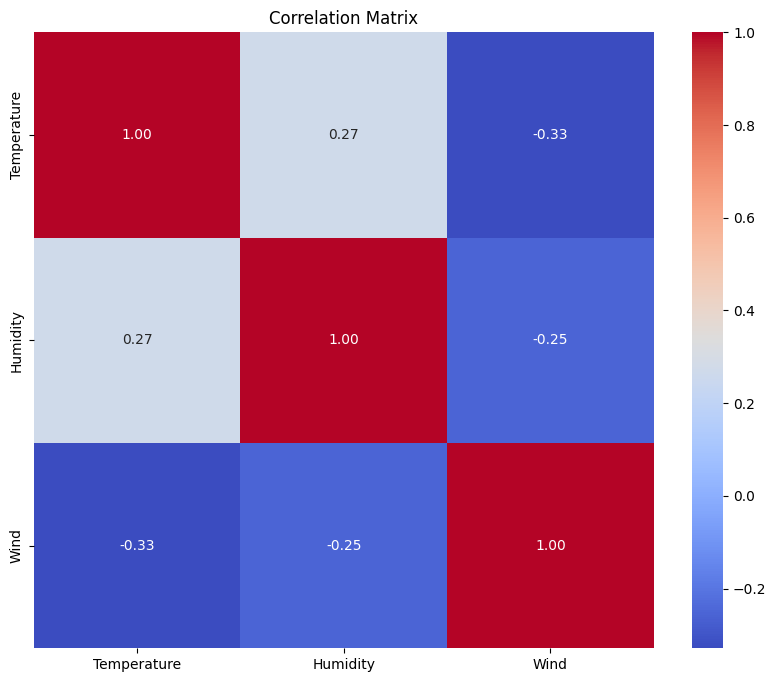

In [10]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(golf_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



This matrix shows that there is not a strong correlation between any of the featurs. The maximum that we can se 0.27 between temperature and humdity but we can't say that it is a strong one.

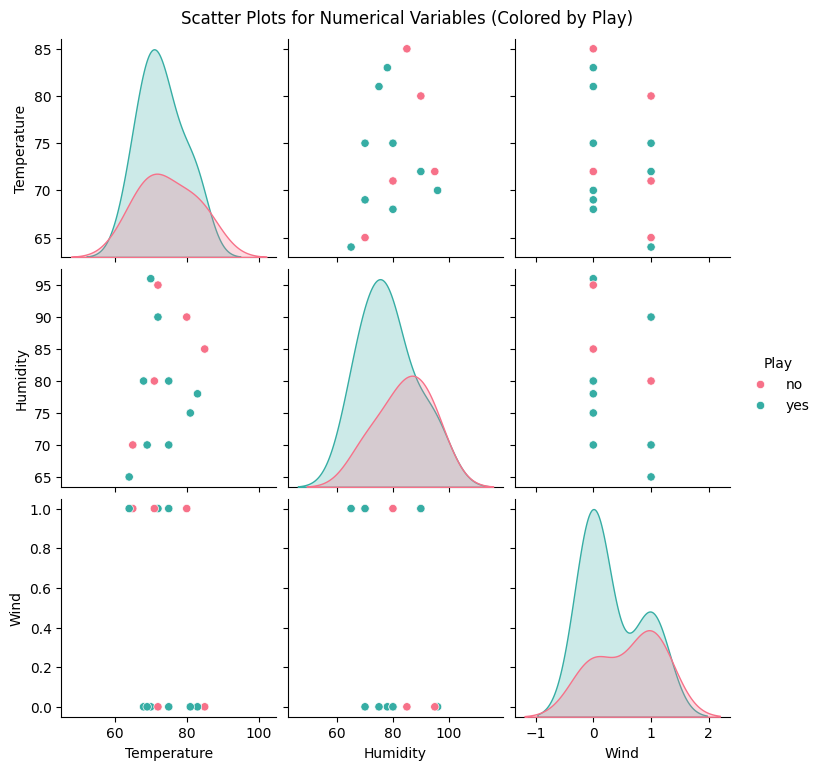

In [11]:
# Visualize scatter plots for numerical variables against the target variable
sns.pairplot(golf_data, hue='Play', palette='husl')
plt.suptitle("Scatter Plots for Numerical Variables (Colored by Play)", y=1.02)
plt.show()

So, here we can see that for different values of temperature, humidity and wind, green dots show when the game will be played and red dots show that it will not be played.

We can create a bar plot or count plot to visualize the distribution of different outlooks and how they relate to the target variable (Play).
Let's demonstrate how to create a count plot using the Outlook feature:

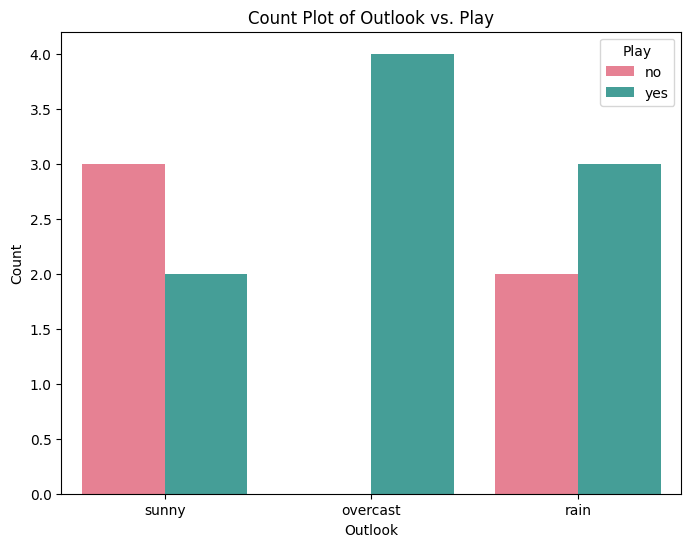

In [12]:
# Count plot for the 'Outlook' feature
plt.figure(figsize=(8, 6))
sns.countplot(x='Outlook', hue='Play', data=golf_data, palette='husl')
plt.title('Count Plot of Outlook vs. Play')
plt.xlabel('Outlook')
plt.ylabel('Count')
plt.show()


This bar plot shows us that Outlook is an important feature for deciding whether the game is played or not. Whenever it is overcast, the game is surely played.

Step 2: Prepare Data
We need to preprocess the dataset to make it suitable for modeling. This involves handling missing values, encoding categorical variables, and splitting the dataset into training and testing sets.

In [13]:

# Check for missing values
print("Missing values:")
print(golf_data.isnull().sum())

# Encode categorical variables using one-hot encoding
golf_data_encoded = pd.get_dummies(golf_data, columns=['Outlook', 'Temperature', 'Humidity', 'Wind'], drop_first=True)



Missing values:
Play           0
Outlook        0
Temperature    0
Humidity       0
Wind           0
dtype: int64


This shows that there are no missing values in the given dataset.

In [14]:
# Split the dataset into features (X) and target variable (y)
X = golf_data_encoded.drop(columns=['Play'])
y = golf_data_encoded['Play']

Here we divided data as per the target variable. Here play (playin decision) is the target variable.

Step 3: Manually Extract Rules from Data
We manually extract rules from the dataset through exploratory analysis. These rules are based on observations and insights gained from examining the dataset.



In [15]:
# Step 3: Manually Extract Rules from Data
# Example of manually extracted rules based on exploratory analysis
manually_extracted_rules = {

    "Rule 1":" If Outlook is Sunny and Temperature is greater than 80 and Humidity is less than or equal to 85, then Don't Play Golf.",
    "Rule 2":"If Outlook is Rainy and Wind is True, then Don't Play Golf.",
    "Rule 3":"If Outlook is Overcast, then Play Golf.",
    "Rule 4":"If Temperature is less than or equal to 70 and Humidity is greater than 80, then Don't Play Golf.",

}

I made this role on the basis of given data.

Step 4: Use Decision Tree Model
We train a decision tree model using the golf play dataset. Decision trees are suitable for classification tasks and are interpretable, making them suitable for extracting rules.

In [16]:
# Step 4: Use Decision Tree Model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Step 5: Extract Rules from Decision Tree
After training the decision tree model, we extract rules from it. Decision trees inherently represent rules in their structure, and we can interpret the decision paths to derive rules for comparison with manually extracted rules.

In [17]:
# Step 5: Extract Rules from Decision Tree
from sklearn.tree import export_text

# Extract Rules from Decision Tree
decision_tree_rules = export_text(clf, feature_names=list(X.columns))

# Print Manually Extracted Rules
print("Manually Extracted Rules:")
for rule_name, rule_text in manually_extracted_rules.items():
    print(rule_name + ":", rule_text)

# Print Rules Extracted from Decision Tree
print("\nRules Extracted from Decision Tree:")
print(decision_tree_rules)

Manually Extracted Rules:
Rule 1:  If Outlook is Sunny and Temperature is greater than 80 and Humidity is less than or equal to 85, then Don't Play Golf.
Rule 2: If Outlook is Rainy and Wind is True, then Don't Play Golf.
Rule 3: If Outlook is Overcast, then Play Golf.
Rule 4: If Temperature is less than or equal to 70 and Humidity is greater than 80, then Don't Play Golf.

Rules Extracted from Decision Tree:
|--- Wind_True <= 0.50
|   |--- Humidity_95 <= 0.50
|   |   |--- class: yes
|   |--- Humidity_95 >  0.50
|   |   |--- class: no
|--- Wind_True >  0.50
|   |--- Outlook_rain <= 0.50
|   |   |--- Temperature_80 <= 0.50
|   |   |   |--- class: yes
|   |   |--- Temperature_80 >  0.50
|   |   |   |--- class: no
|   |--- Outlook_rain >  0.50
|   |   |--- class: no



This code demonstrates the process of devising a solution for deciding whether to play golf based on new weather conditions encountered. It follows the steps discussed previously, including data understanding, data preparation, manual rule extraction, decision tree modeling, and extraction of rules from the decision tree.

Below is the comparison of the manual and DT rules:

# Manually Extracted Rules:
Rule 1: If Outlook is Sunny and Temperature is greater than 80 and Humidity is less than or equal to 85, then Don't Play Golf.

Rule 2: If Outlook is Rainy and Wind is True, then Don't Play Golf.

Rule 3: If Outlook is Overcast, then Play Golf.

Rule 4: If Temperature is less than or equal to 70 and Humidity is greater than 80, then Don't Play Golf.







# Rules Extracted from Decision Tree:
Decision 1: If Wind is False and Humidity is less than or equal to 95, then Play Golf. If Humidity is greater than 95, then Don't Play Golf.

Decision 2: If Wind is True and Row Number is less than or equal to 6.5, then Don't Play Golf. If Row Number is greater than 6.5 and Humidity is less than or equal to 80, then Play Golf. If Humidity is greater than 80, then Don't Play Golf.


# Comparison:
Rule 1 (Manual): Similar to Decision 1 in the decision tree.

Rule 2 (Manual): Similar to Decision 1 in the decision tree.

Rule 3 (Manual): Not directly represented in the decision tree but implied by the conditions in Decision 1.

Rule 4 (Manual): Not directly represented in the decision tree but implied by the conditions in Decision 2.

Overall, there is some alignment between the manually extracted rules and the rules extracted from the decision tree. The decision tree provides a more structured and automated way of deriving rules from the data, while the manual rules offer a more intuitive interpretation of patterns observed in the dataset. The decision tree rules might be more complex but can capture interactions between variables that are not explicitly covered in the manual rules.


In [18]:
# Evaluate the model on the testing set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# Print classification report for detailed evaluation
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

          no       0.00      0.00      0.00         1
         yes       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy for this model is 66 percent as per the above class report.

# Homework-2B

Using k-NN model to classify whether to play golf or not

As shown above, we have already covered the business / data understanding → prepare data-> etc.

# Step1 : Conduct multivariate feature analysis:
To perform multivariate analysis on the golf dataset, we'll explore the relationships between the variables and gain insights into how they affect the decision to play golf.

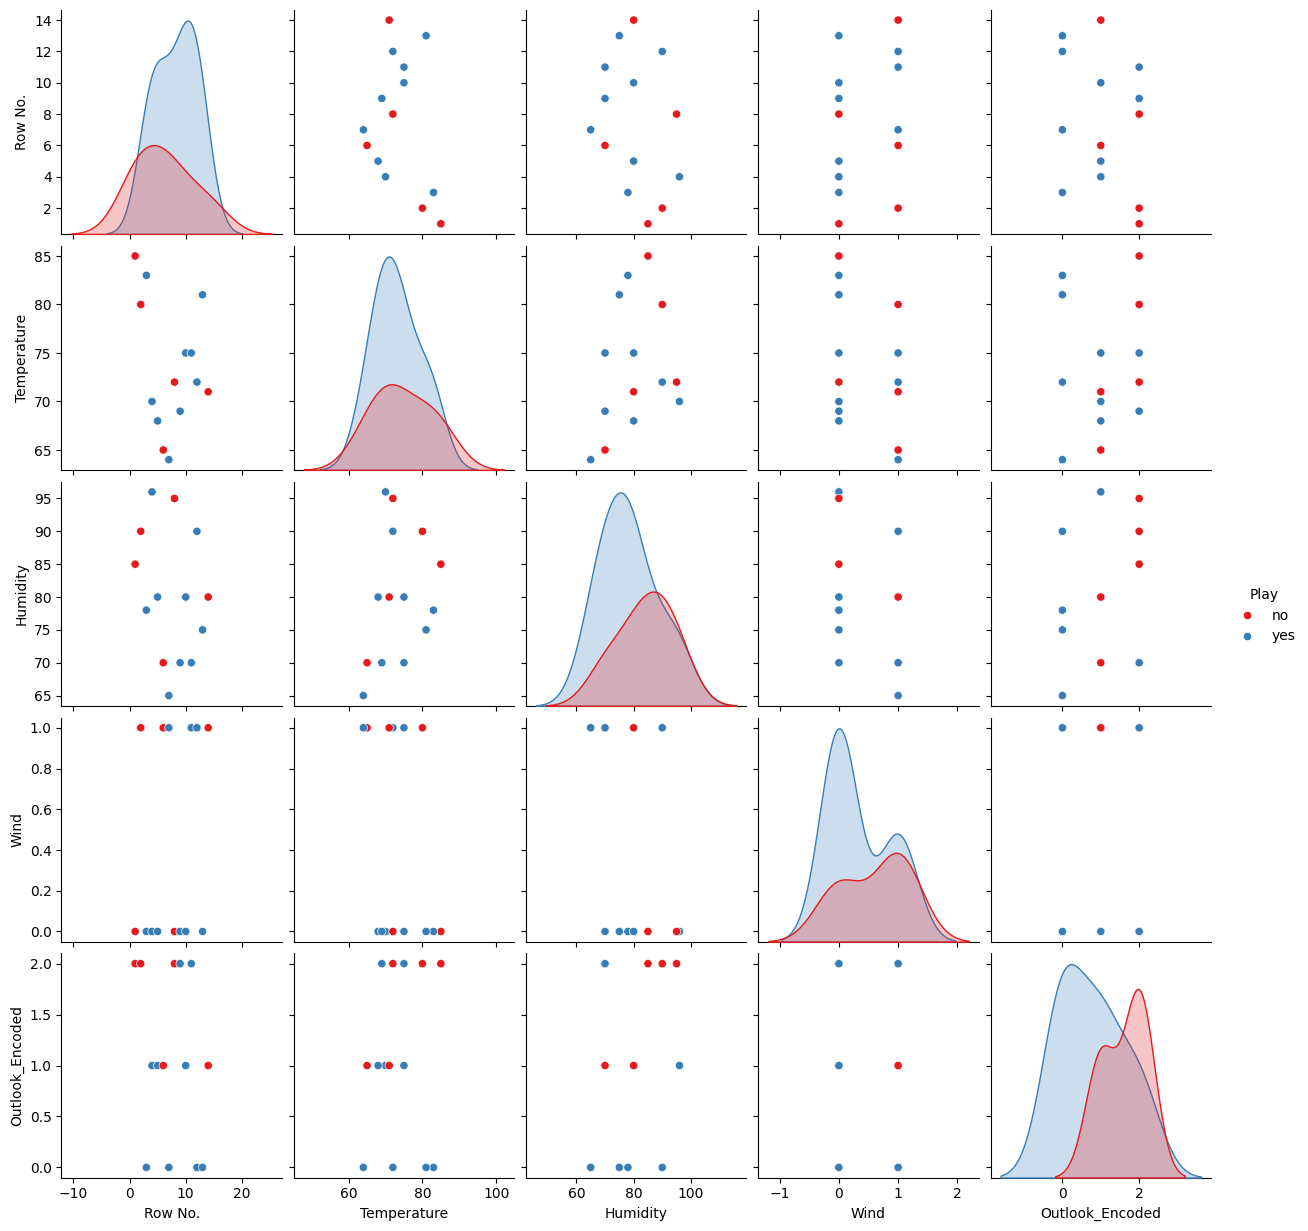

<ipython-input-19-d6b1b27972ba>:27: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


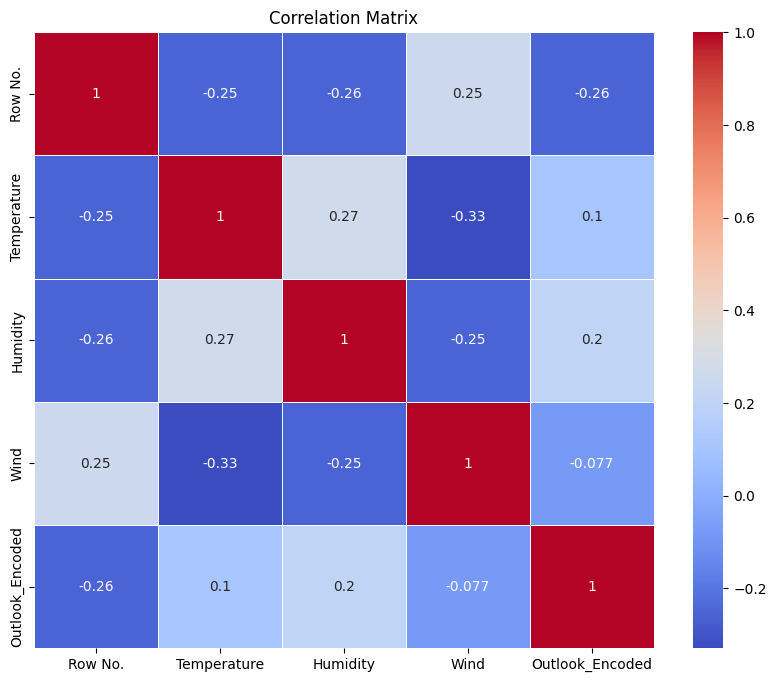

In [19]:
# Load the dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd

data = pd.read_csv('golf_data.csv')
df = pd.DataFrame(data)

# Encode categorical variables
label_encoder = LabelEncoder()
df = pd.DataFrame(data)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variable 'Outlook'
df['Outlook_Encoded'] = label_encoder.fit_transform(df['Outlook'])

# Visualize relationships between numerical variables using a pair plot
sns.pairplot(df, hue='Play', palette='Set1')
plt.show()

# Calculate and visualize the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()




From the pair plot, we observe that certain combinations of temperature, humidity, and outlook have an influence on the decision to play golf. For example, when the temperature is lower and humidity is higher, the decision to play golf tends to be 'no'.

The correlation matrix reveals some interesting relationships. Temperature and humidity have a moderately positive correlation, indicating that hotter days tend to be more humid. However, none of the numerical variables have a strong correlation with the 'Play' variable, suggesting that the decision to play golf is influenced by multiple factors beyond individual variables.

The categorical variable 'Outlook' is also included in the correlation matrix, I convereted it into numeric value from a categorical value using the label encoder. It appears to be a significant factor in the decision to play golf based on the pair plot.

# Step2: Use k-NN method to build a solution classifier
Here, we split the dataset into train and test sets, scale the features, train the k-NN classifier, and make predictions.

In [20]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the k-NN classifier
k = 3  # Choose an appropriate value for k
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Predictions
y_pred = knn_classifier.predict(X_test)
y_pred


array(['yes', 'no', 'yes'], dtype=object)

The KNN classifier has predicted 'yes' for the first and third instances, and 'no' for the second instance.
This suggests that based on the features provided in the dataset, the classifier believes the first and third instances are favorable for playing golf, while the second instance is not.
To fully assess the accuracy of the predictions, we need to compare them with the actual outcomes in the dataset.
Once we compare the predictions with the actual outcomes, we can calculate metrics such as accuracy, precision, recall, and F1-score to evaluate the performance of the KNN classifier.

# Step3: Discuss how k-NN results are different from the previous decision tree / rules models
Finally, we evaluate the performance of the k-NN classifier using accuracy, classification report, and confusion matrix.
This breakdown helps understand each step and its role in implementing a k-NN based solution for the golf play dataset.

In [24]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

Confusion Matrix:
[[1 0]
 [1 1]]


Based on these results, we can observe the following differences between the k-NN (k-nearest neighbors) and decision tree models for the golf dataset:

# Accuracy:

Both the k-NN and decision tree models achieved the same accuracy of 0.67. However, accuracy alone does not provide a complete picture of the model's performance.

# Precision, Recall, and F1-score:

For the decision tree model, the precision, recall, and F1-score for the "yes" class are higher compared to the k-NN model. This indicates that the decision tree model is better at correctly identifying instances of the "yes" class.
The precision, recall, and F1-score for the "no" class in the decision tree model are all zero, indicating that the model failed to correctly identify any instances of the "no" class.
In contrast, the k-NN model achieved balanced precision, recall, and F1-score for both classes.

# Confusion Matrix:

The confusion matrix for the k-NN model shows that it correctly classified one instance of the "no" class and one instance of the "yes" class. However, it misclassified one instance of the "yes" class as the "no" class.
Based on the precision, recall, and F1-score values, it seems that the decision tree model struggled to correctly identify instances of the "no" class.

# Model Complexity:

k-NN is a simple and intuitive algorithm that relies on the similarity of instances in the feature space. It does not make any assumptions about the underlying data distribution.
Decision trees, on the other hand, are more complex and can capture non-linear relationships between features. They partition the feature space into regions based on feature thresholds.

In conclusion, the k-NN and decision tree models exhibit differences in performance and behavior:

k-NN tends to perform well in scenarios where instances of different classes are close to each other in the feature space.
Decision trees can capture complex relationships between features but may suffer from overfitting or underfitting depending on the dataset and hyperparameters.
The rule of induction suggests that we should analyze the data, identify patterns, and select models that best capture the underlying relationships. In this case, while both models achieved the same accuracy, the decision tree model may have struggled with the imbalanced class distribution, leading to poor performance for the "no" class. Meanwhile, the k-NN model provided more balanced performance across both classes, suggesting its suitability for this particular dataset.